# Mid term project

(3)

### Electrocardiogram (ECG)

An electrocardiogram — abbreviated as EKG or ECG — is a test that measures the electrical activity of the heartbeat. With each beat, an electrical impulse (or “wave”) travels through the heart. This wave causes the muscle to squeeze and pump blood from the heart. A normal heartbeat on ECG will show the timing of the top and lower chambers. 

The right and left atria or upper chambers make the first wave called a “P wave" — following a flat line when the electrical impulse goes to the bottom chambers. The right and left bottom chambers or ventricles make the next wave called a “QRS complex." The final wave or “T wave” represents electrical recovery or return to a resting state for the ventricles.

An ECG gives two major kinds of information. First, by measuring time intervals on the ECG, a doctor can determine how long the electrical wave takes to pass through the heart. Finding out how long a wave takes to travel from one part of the heart to the next shows if the electrical activity is normal or slow, fast or irregular. Second, by measuring the amount of electrical activity passing through the heart muscle, a cardiologist may be able to find out if parts of the heart are too large or are overworked.

### Electroencephalogram (EEG)

An electroencephalogram (EEG) is a test used to evaluate the electrical activity in the brain. Brain cells communicate with each other through electrical impulses. An EEG can be used to help detect potential problems associated with this activity.

An EEG tracks and records brain wave patterns. Small flat metal discs called electrodes are attached to the scalp with wires. The electrodes analyze the electrical impulses in the brain and send signals to a computer that records the results.

The electrical impulses in an EEG recording look like wavy lines with peaks and valleys. These lines allow doctors to quickly assess whether there are abnormal patterns. Any irregularities may be a sign of seizures or other brain disorders.

An EEG is used to detect problems in the electrical activity of the brain that may be associated with certain brain disorders. The measurements given by an EEG are used to confirm or rule out various conditions, including:

seizure disorders (such as epilepsy),<br>
head injury,<br>
encephalitis (inflammation of the brain),<br>
brain tumor,<br>
encephalopathy (disease that causes brain dysfunction),<br>
memory problems,<br>
sleep disorders,<br>
stroke,<br>
dementia,<br>
When someone is in a coma, an EEG may be performed to determine the level of brain activity. The test can also be used to monitor activity during brain surgery.


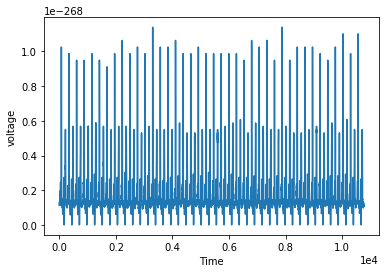

In [28]:
(4)

%matplotlib inline


import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


f = open('aami3a.dat','rb')
s = np.fromfile(f,count=-1)
plt.plot(s[:])

plt.xlabel('Time')
plt.ylabel('voltage')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
f.close()

 The above written code open the file 'aami31.dat' in binary- read only mode for that we use open() function which take two parameters ('aami31.dat','rb'), next we load the file in to the array s so we can simply plot the signal.

(5)

Let's consider that we are sampling the heart signal at rate fsfs, so we have fsfs samples per second. We have between 1 and 1.67 beats per second. If We plot fsfs to 1.67fs1.67fs samples we'll get one beat, so we need to plot between 5fs5fs and 8.33fs8.33fs samples to get 5 beats.

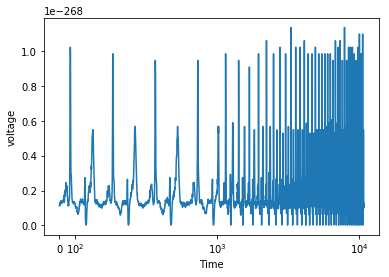

In [29]:
(6)

%matplotlib inline


import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


f = open('aami3a.dat','rb')
AllSignal = np.fromfile(f,count=-1)
plt.plot(AllSignal[:])

plt.xlabel('Time')
plt.ylabel('voltage')
plt.xscale('symlog',linthreshx=1000)
f.close()

The above written code is used to zoom-in of the signal where 5 cardiac cycles can be observed considering this person has a cardiac cycle of 60 beats/minute. First we open the .dat file using open(), then we load all the data in to an array, then we simply plot the array, to obtain the zoom-in we use xscale(), xscale() takes two parameters 1.'symlog', 2. linthreshx= A single float which defines the range (-x, x), within which the plot is linear. This avoids having the plot go to infinity around zero.we assign linthreshx to 1000 so that we can observe 5 cardiac cycles.

(7)

We cannot determine the heart rate of a person just by looking at a single cardiac cycle. these are the things we need to determine the heart beat

Step 1 – Heart rate,  <br>
Step 2 – Heart rhythm,<br>
Step 4 – P-waves,<br>
Step 5 – P-R interval,<br>
Step 6 – QRS complex,<br>
Step 7 – ST segment,<br>
Step 8 – T waves.<br>

Just by looking at the signal we can tell that we cant measure the P-R interval,QRS Complex and ST segment without those values it is not possible to measure the heart beat of a person and we also need more than 10 cardiac cycles to measure the heart rate accurately.


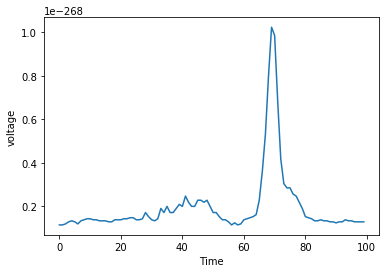

In [30]:
(8)

%matplotlib inline


import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


f = open('aami3a.dat','rb')
AllSignal = np.fromfile(f,count=-1)
plt.plot(AllSignal[:100])

plt.xlabel('Time')
plt.ylabel('voltage')
f.close()

8

 heart rate of this individual in beats/minute = (25mm/sec * 60 sec/min)/no. of squares  =  1500/no. of squares<br>
 From the above plot we can tell the average QRS Complex accupies 20 line which is 80-60=20.<br>
 we know 1 square is 1ms so 20 squares 20ms.<br>
 heart rate of this individual in beats/minute = 1500/20= 75 beats/minute.<br>
 
so, The heart rate of this individual is 75 beats/minute.

In [31]:
(9)

#applying fft to the given signal
ecg=s-np.mean(s)
ecg=len(s)
a = 360
f=np.arange(0,a,step)
Y=np.fft.fft(ecg)
mean_val =abs(Y)/ecg
plt.plot(f, mean_val[:int(temp)])
plt.title('fft of the signal')
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

NameError: name 'step' is not defined

In [ ]:
(10)

#this code is used to obtain the frequency where maximum is obtained
for amplitude in range(0,freq)
   amp2=freq-1
    if amp2>amplitude
       amplitude = amp2;
        else 
          amplitude = amplitude
print "amplitude %d"%amplitude


(11)

heart rate in beats/minute = 75.


(12)

The peaks from the speactrum are basically the amplitude levels obtained from the signal which is also called as the height of the QRS peak, The width and the height of the QRS peaks are crutial in order to caliculate the heart rate.

(13)

As the given signal is quite clean there is no need to use a filter to clean the signal, Even if we use a low pass filter we need to make sure that we dont lose any data i.e the amplitude of the signal.

In [ ]:
(14)

from scipy import sci
import matplotlib.pyplot as plt
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
 plt.show()

<br>1. American Heart Association <br>
  ECG(question 3)- http://www.heart.org/HEARTORG/Conditions/HeartAttack/DiagnosingaHeartAttack/Electrocardiogram-ECG-or-EKG_UCM_309050_Article.jsp#.We3-bWhSzIU
    
<br>2. Health Line
     <br> EEG(question 3)- https://www.healthline.com/health/eeg#overview1

<br>3. Matplotlib
      <br>  xscale()(question 6) - https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xscale.html

<br>4. GeekyMedics
     <br>  question 7 - https://geekymedics.com/how-to-read-an-ecg/

<br>5. KCUMB 
      <br>  ECG calculations (question 8) - https://courses.kcumb.edu/physio/ecg%20primer/normecgcalcs.htm